In [19]:
#!/usr/bin/env python3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf
from pathlib import Path

prices = np.loadtxt("./data/prices.txt").T

## Eyeballing the trend

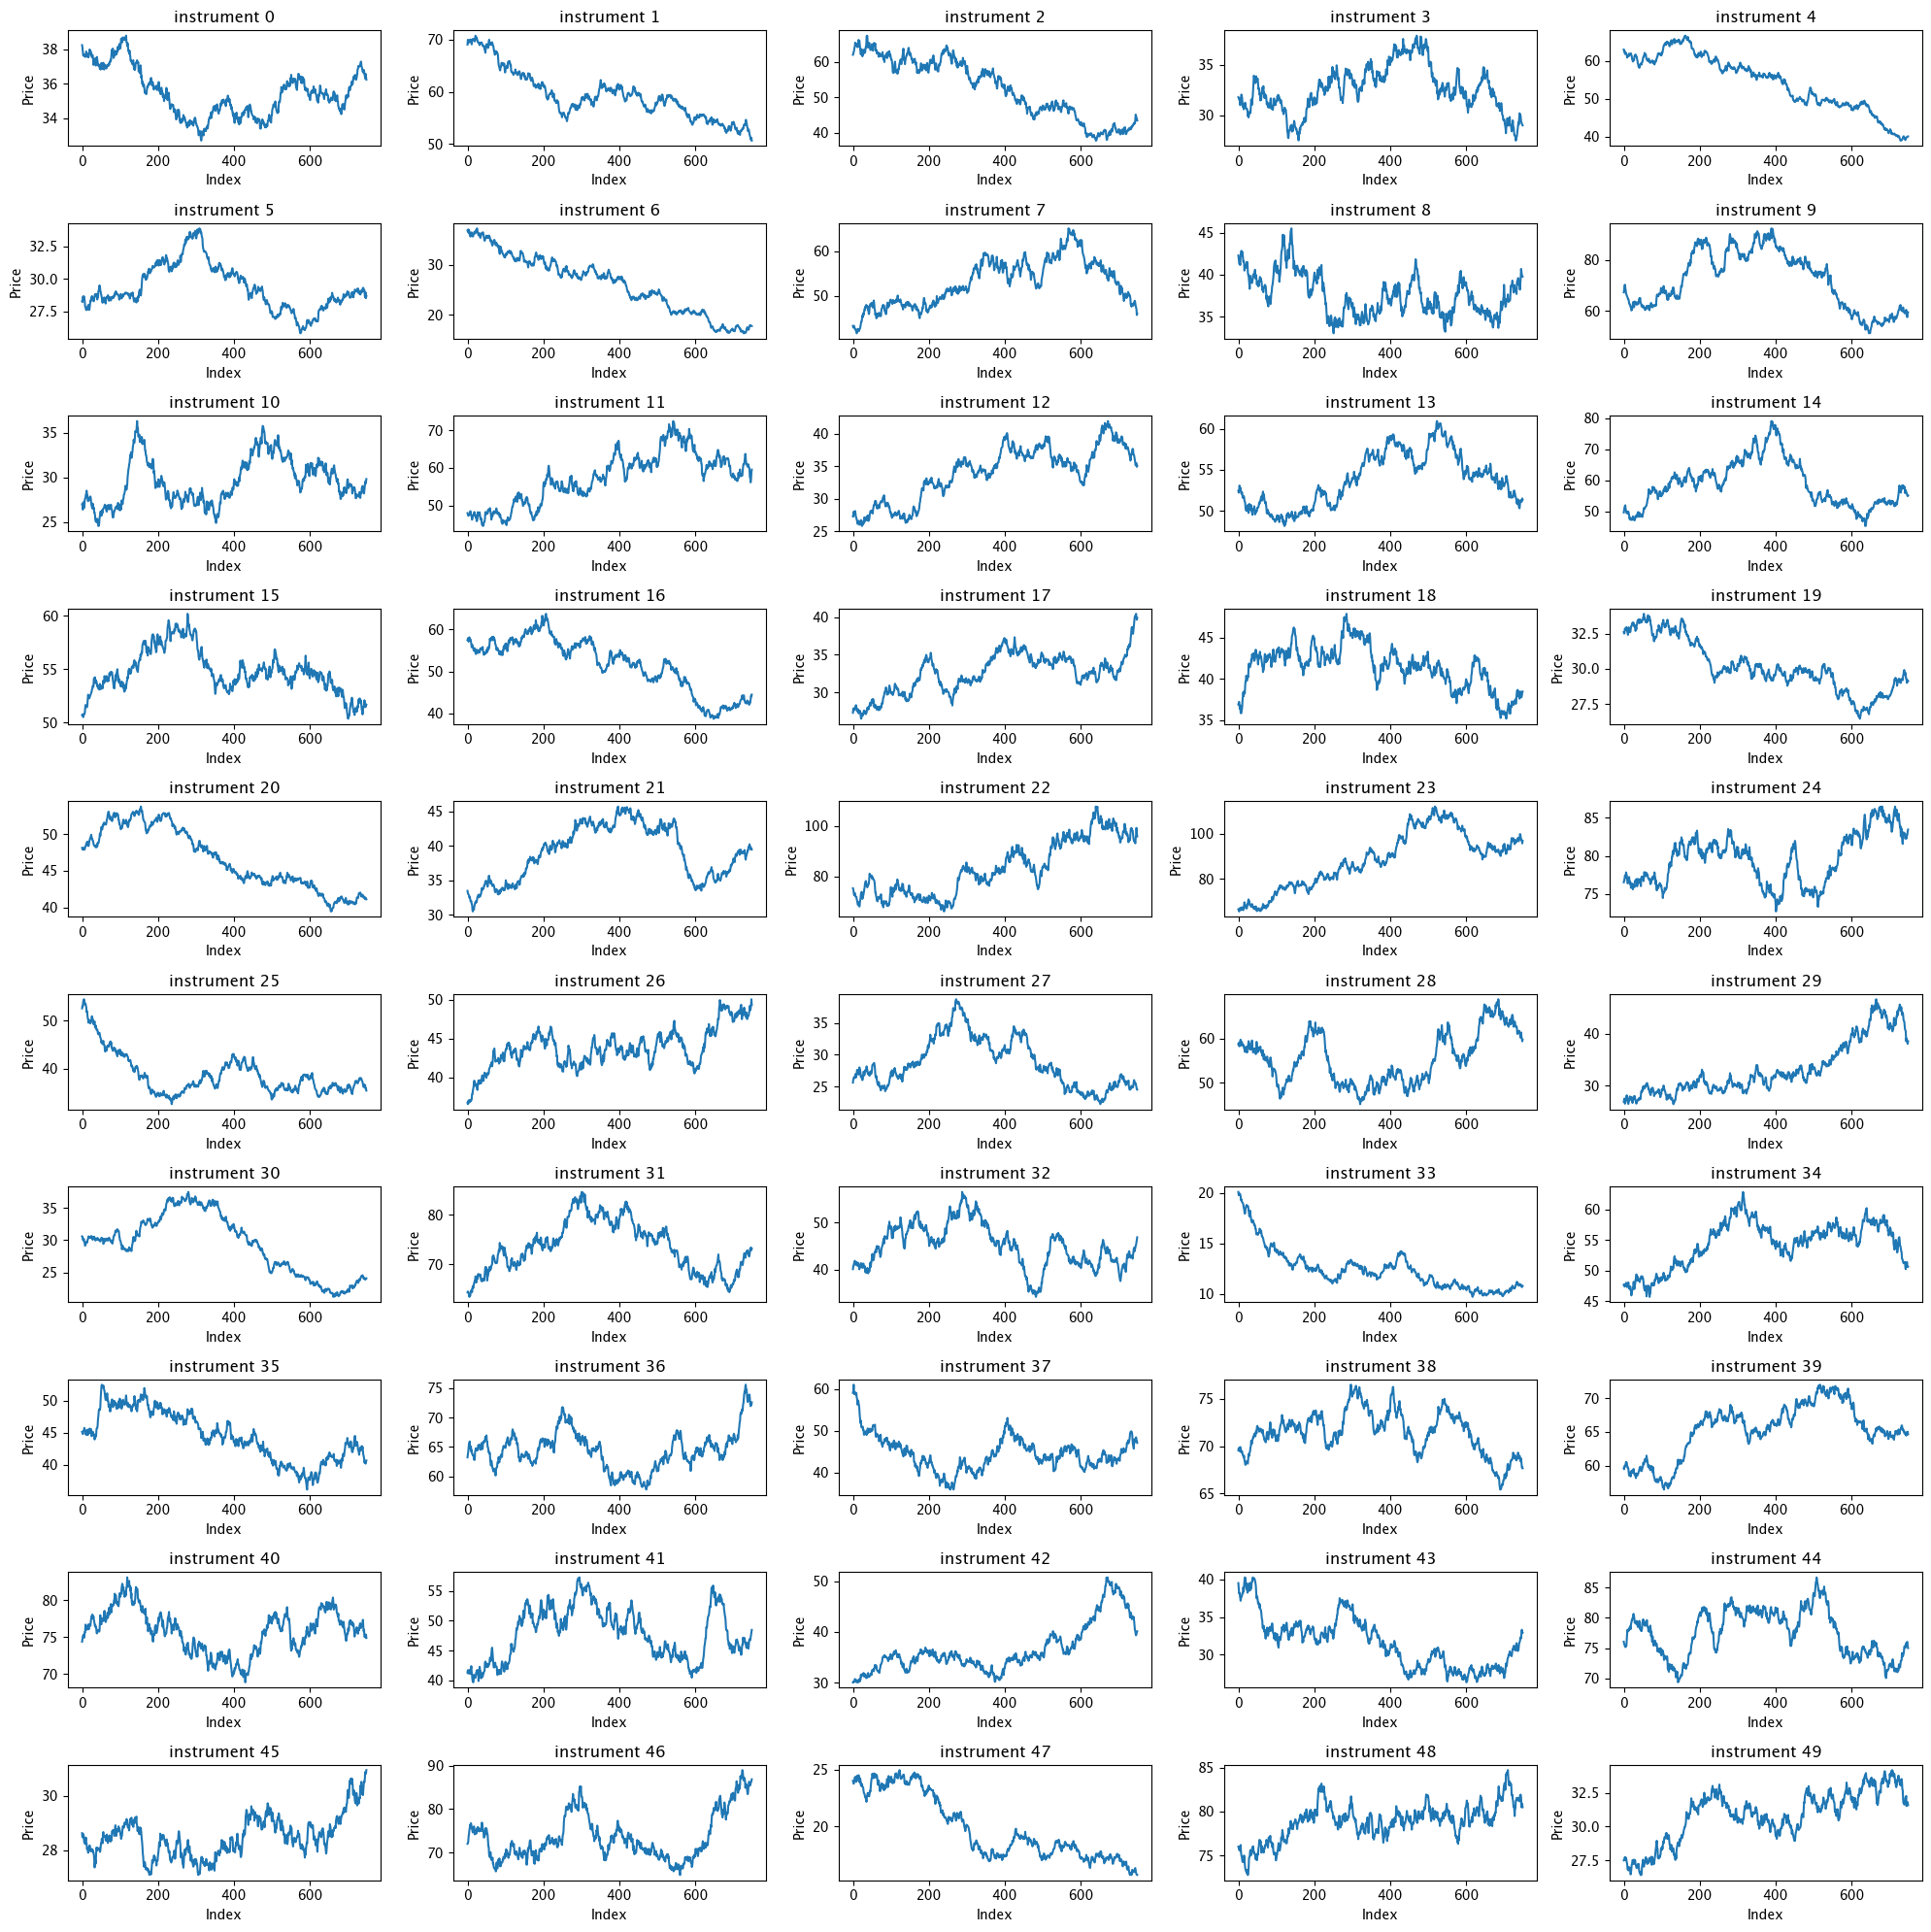

In [20]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D axes array for easier iteration

# Plot each column in its own subplot
for i in range(50):
    axes[i].plot(prices[i])
    axes[i].set_title(f'instrument {i}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Price')

# Turn off any unused subplots if num_columns < 50
for i in range(50, 50):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

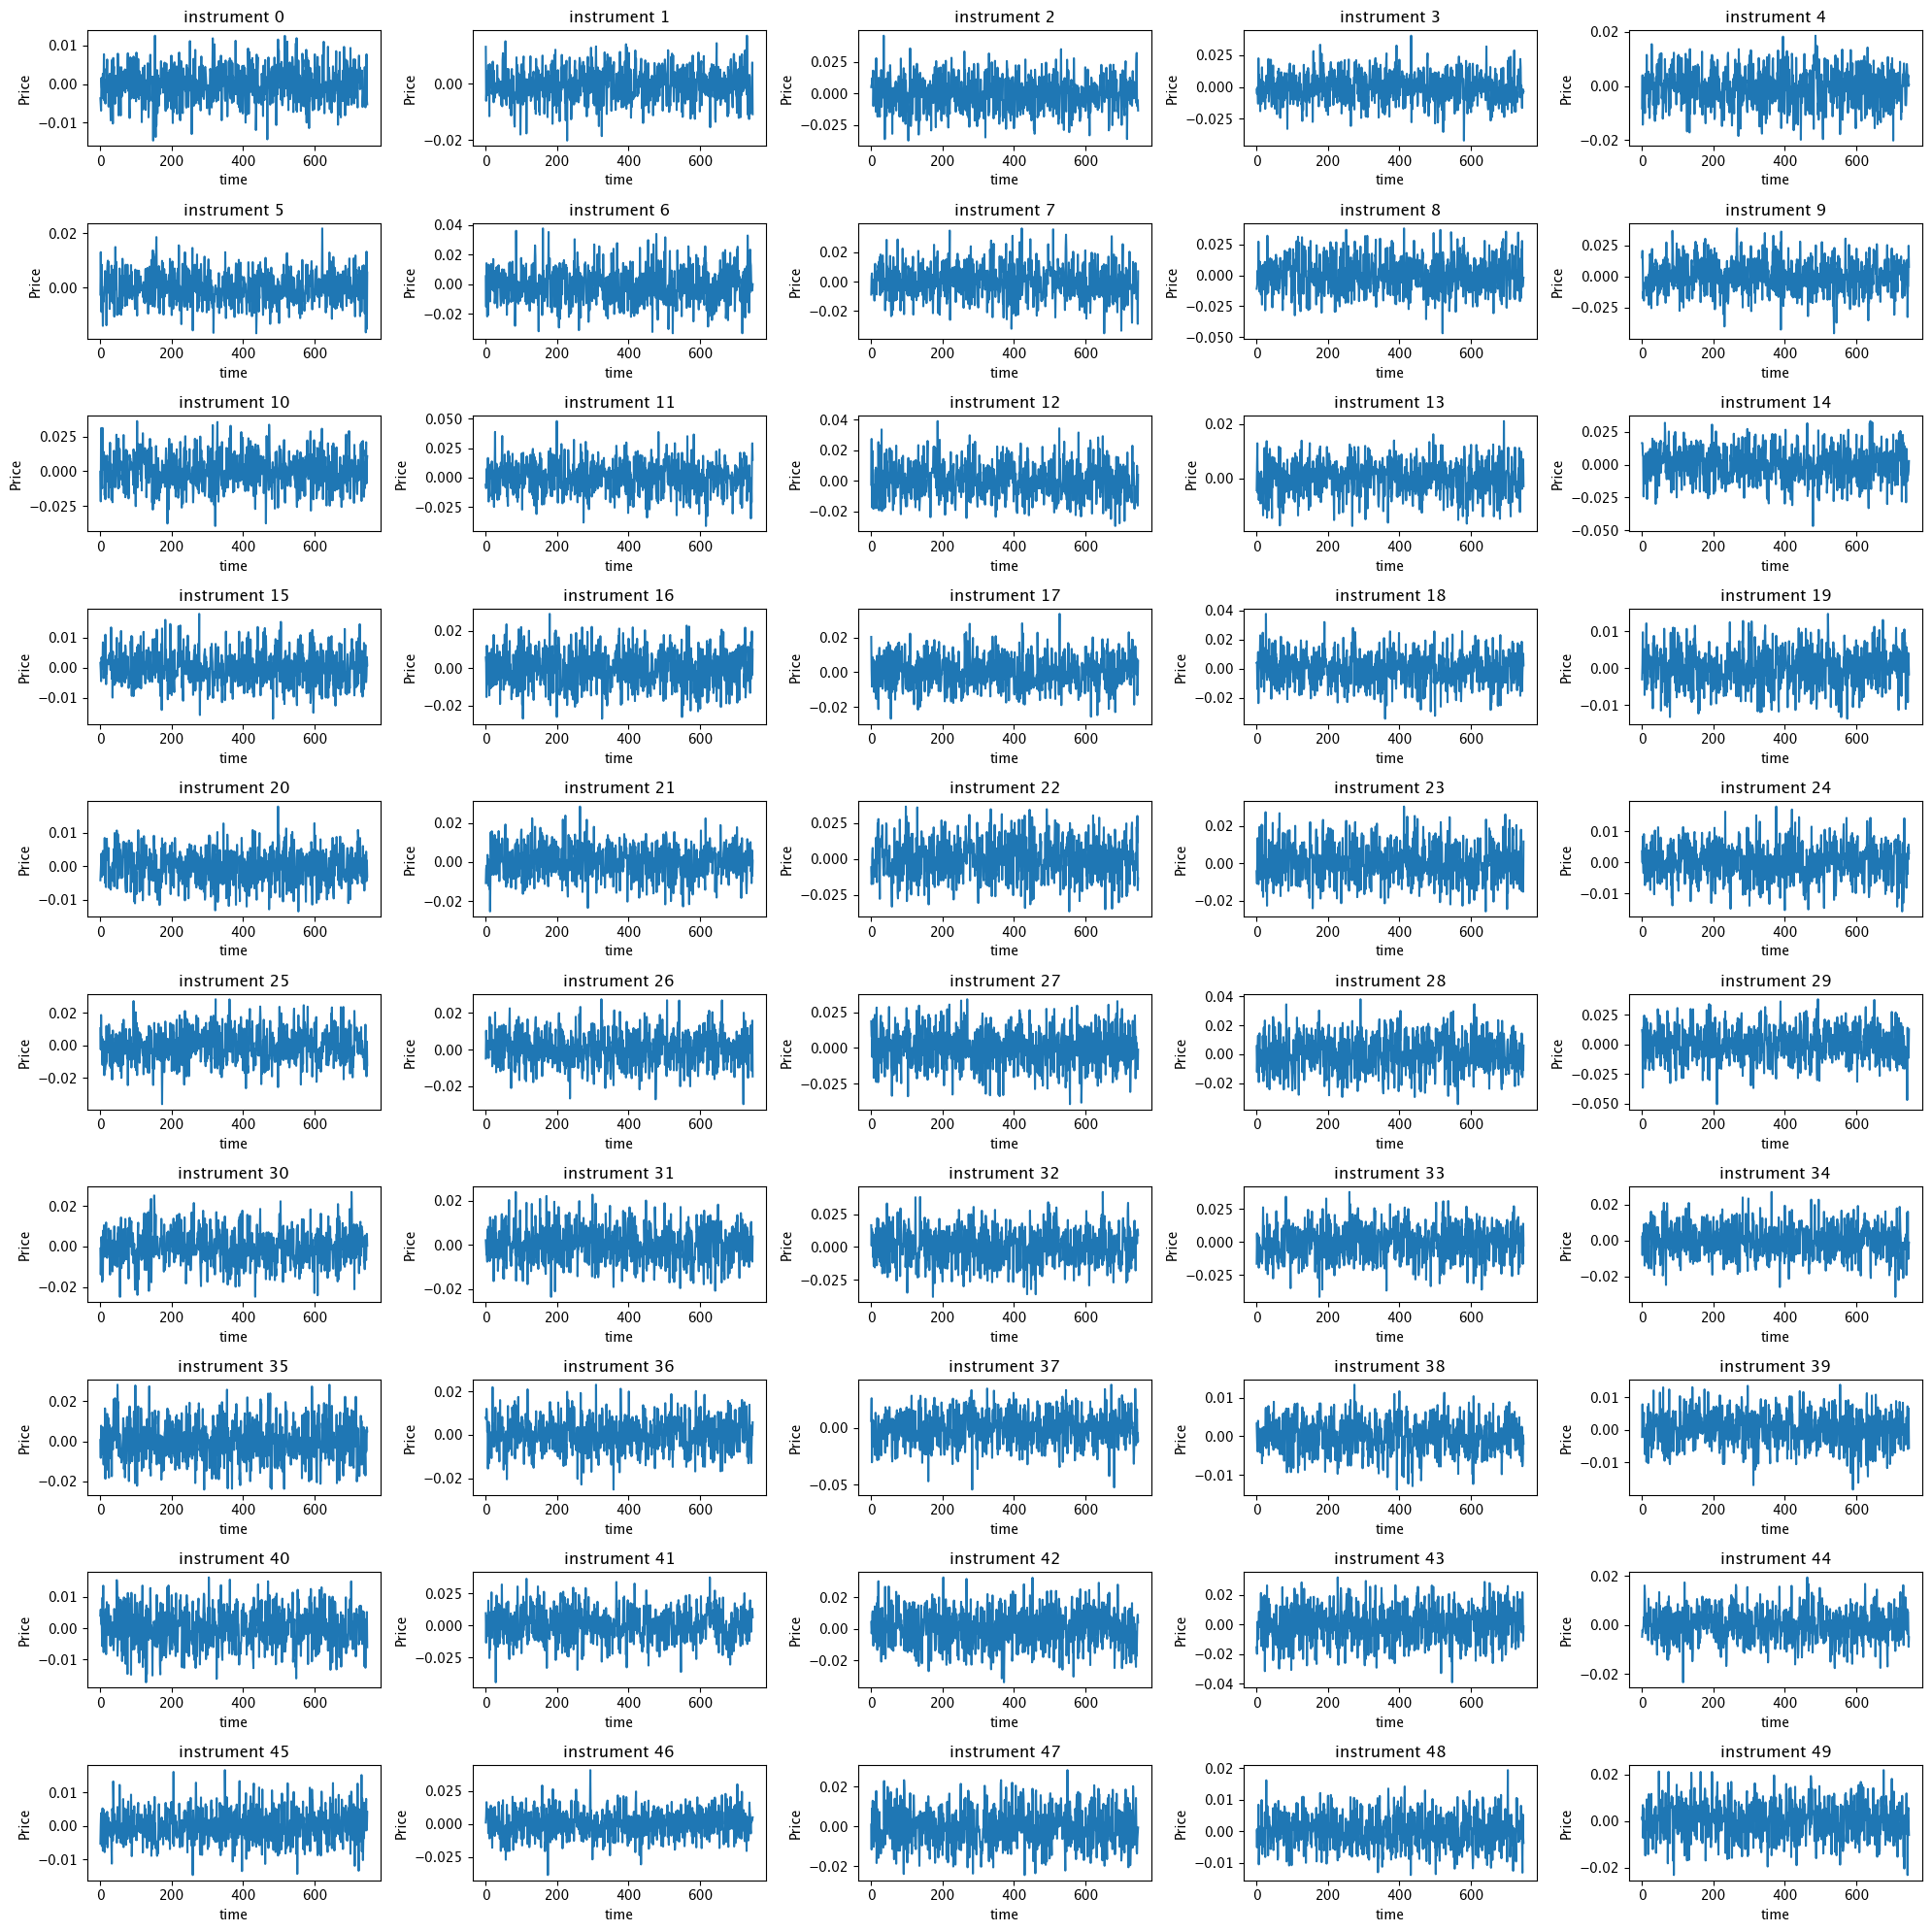

In [ ]:
returns = np.log(prices[:, 1:] / prices[:, :-1])

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D axes array for easier iteration

# Plot each column in its own subplot
for i in range(50):
    axes[i].plot(returns[i])
    axes[i].set_title(f'instrument {i}')
    axes[i].set_xlabel('time')
    axes[i].set_ylabel('Returns')

# Turn off any unused subplots if num_columns < 50
for i in range(50, 50):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

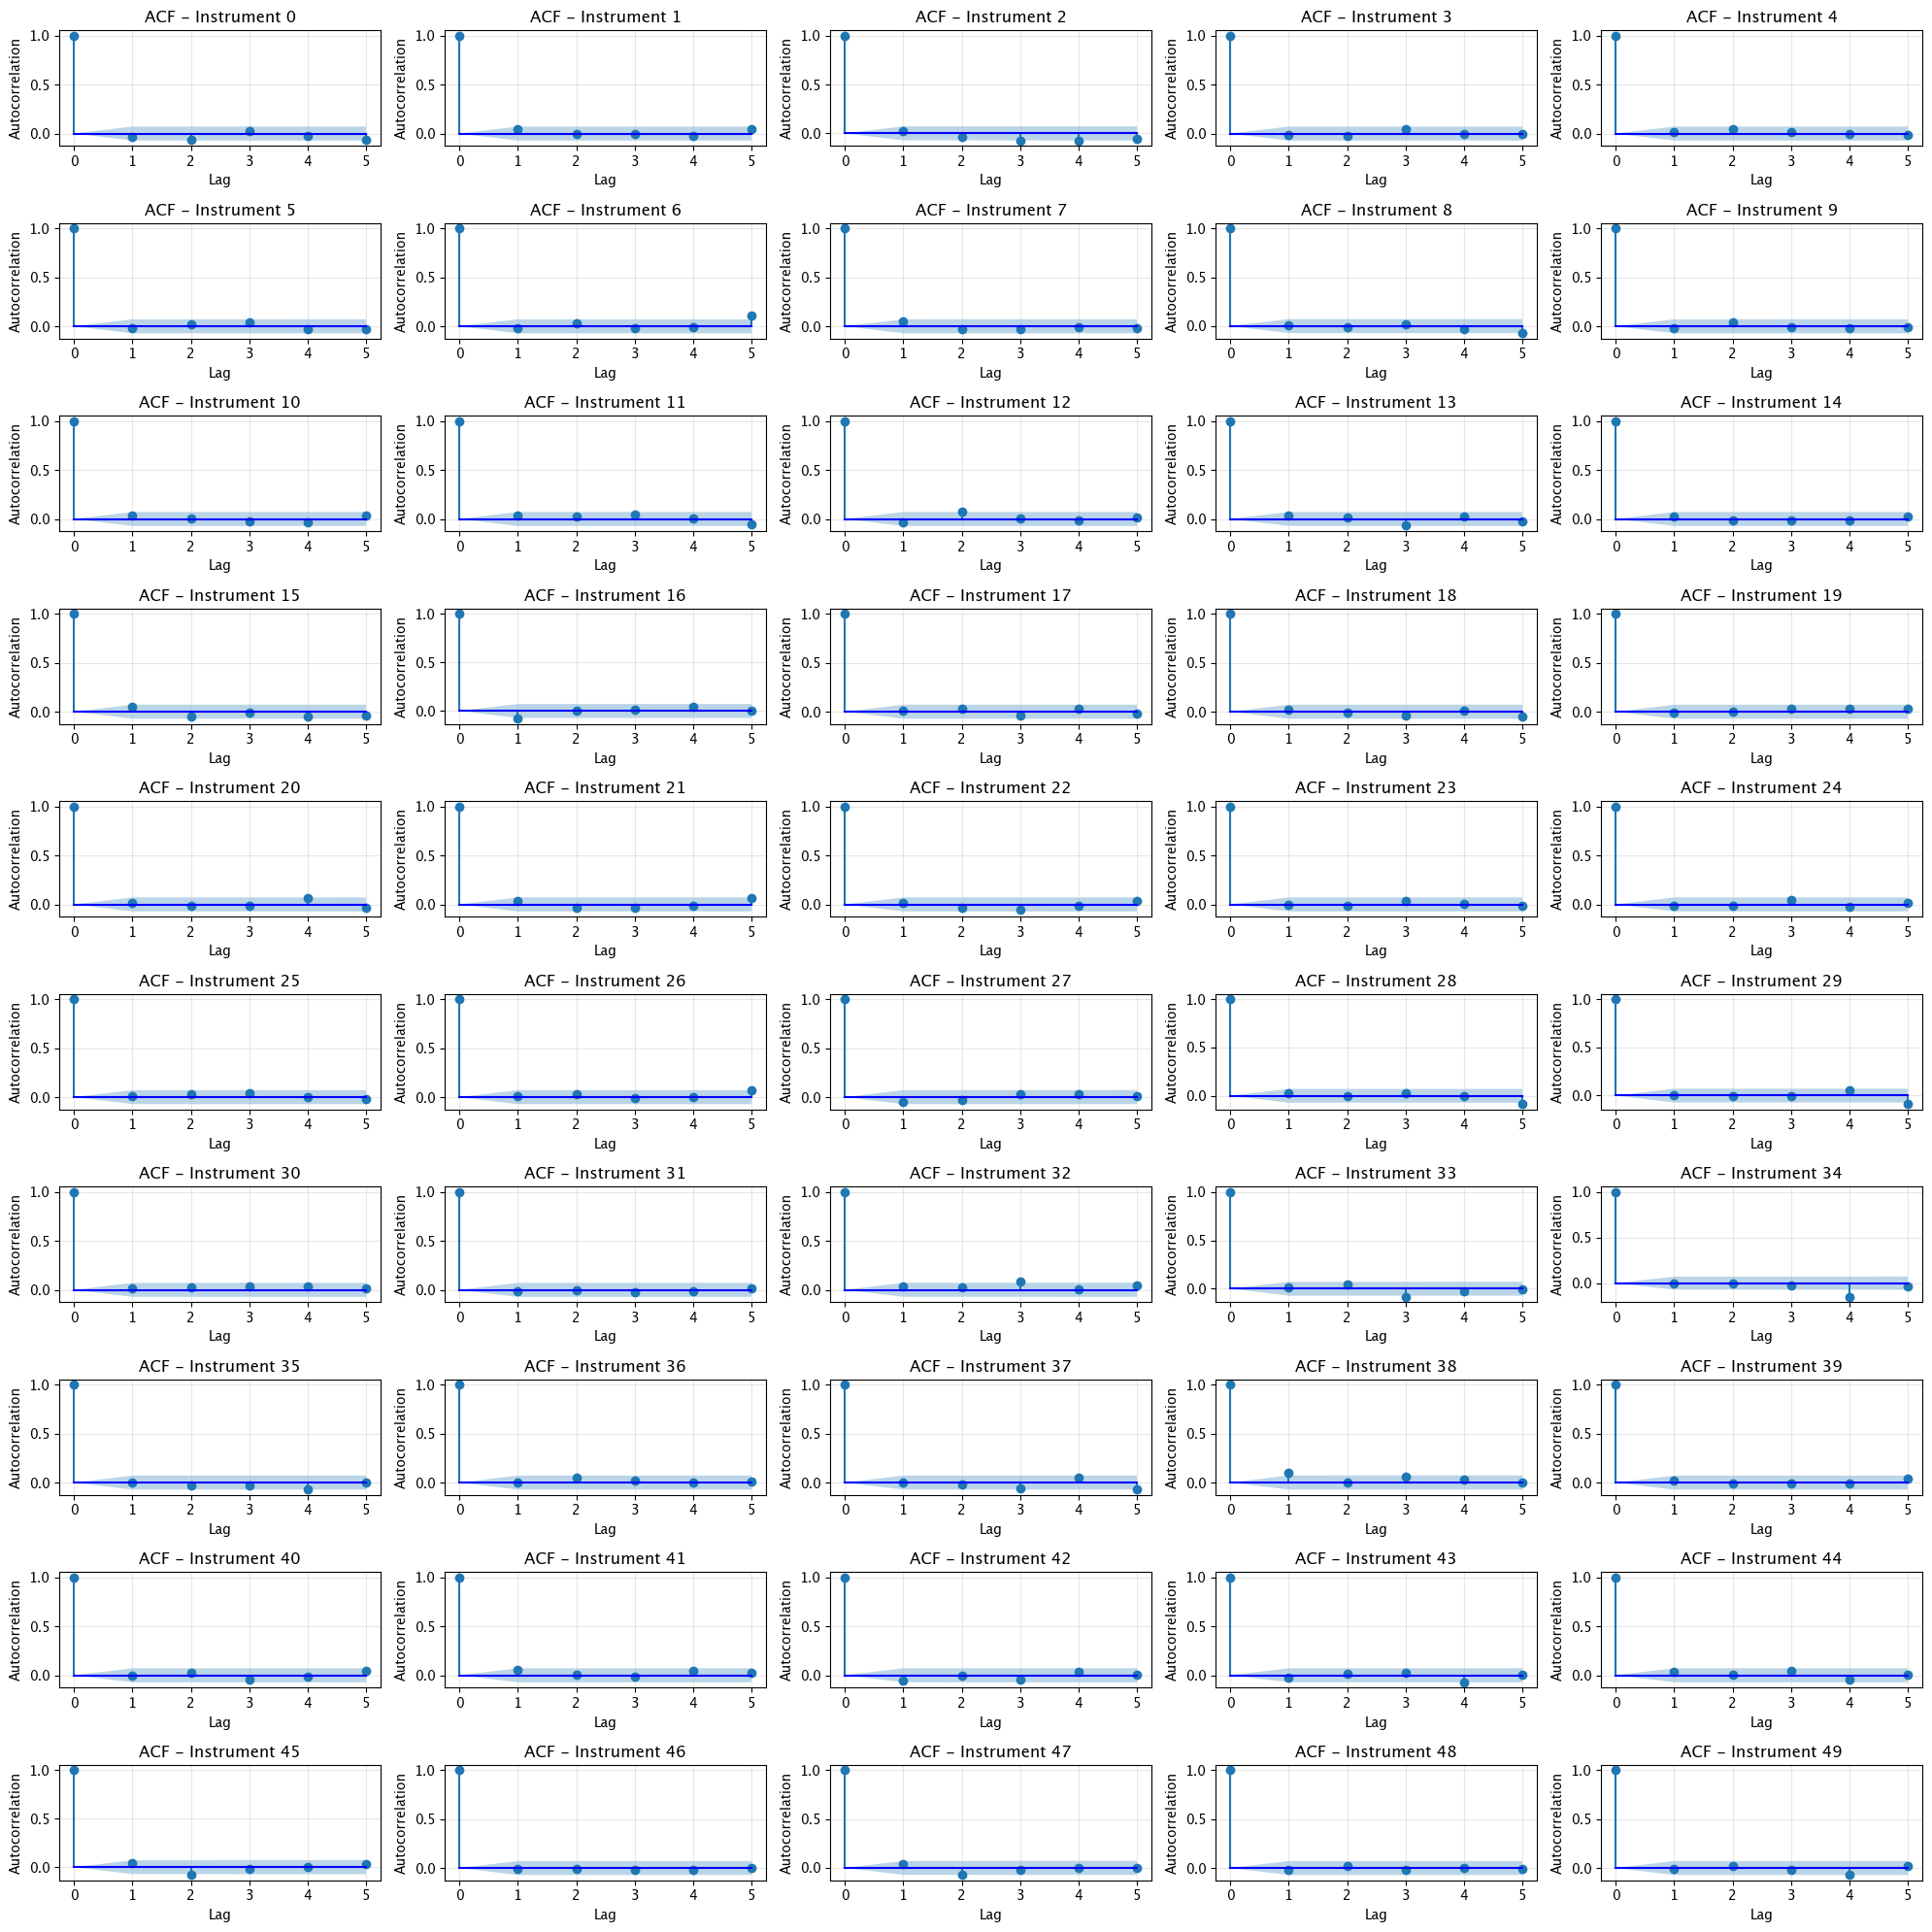

In [22]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20))
axes = axes.flatten()

# Plot ACF for each instrument using custom approach
for i in range(50):
    # Calculate ACF with confidence intervals
    autocorr, confint = acf(returns[i], nlags=5, alpha=0.05)
    lags = np.arange(len(autocorr))
    
    # Create custom ACF plot
    axes[i].stem(lags, autocorr, basefmt='b-')
    axes[i].fill_between(lags, confint[:, 0] - autocorr, 
                        confint[:, 1] - autocorr, alpha=0.3)
    
    axes[i].set_xlabel('Lag')
    axes[i].set_ylabel('Autocorrelation')
    axes[i].set_title(f'ACF - Instrument {i}')
    axes[i].grid(True, alpha=0.3)

# Turn off any unused subplots
for i in range(50, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

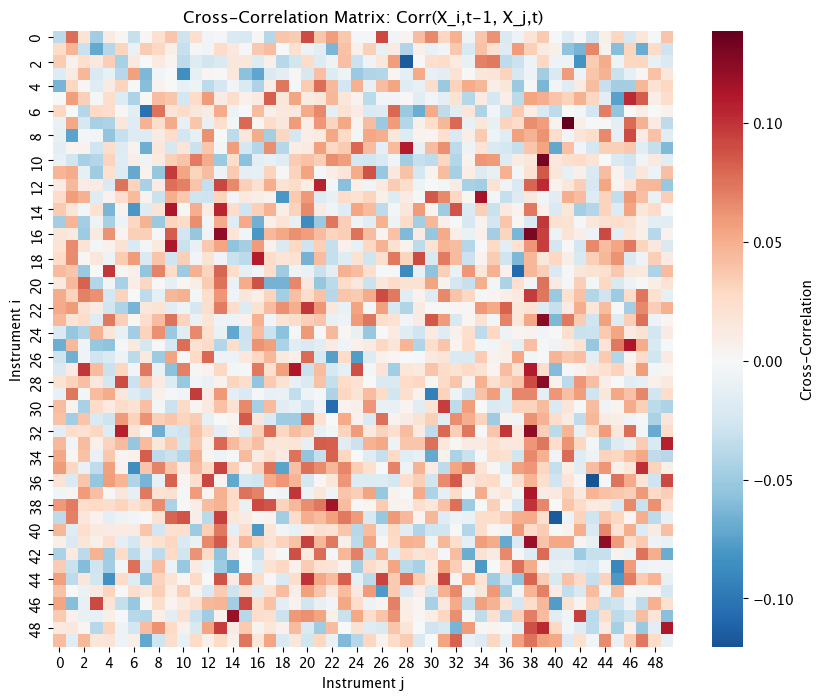

In [23]:
cross_corr_matrix = np.zeros((50, 50))

for i in range(50):
    for j in range(50):
        # x_{t-1} for instrument i
        x_lagged = returns[i][:-1]
        # y_t for instrument j  
        y_current = returns[j][1:]
        
        # Calculate correlation
        cross_corr_matrix[i, j] = np.corrcoef(x_lagged, y_current)[0, 1]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_corr_matrix, cmap='RdBu_r', center=0, 
            cbar_kws={'label': 'Cross-Correlation'})
plt.title('Cross-Correlation Matrix: Corr(X_i,t-1, X_j,t)')
plt.xlabel('Instrument j')
plt.ylabel('Instrument i')
plt.show()

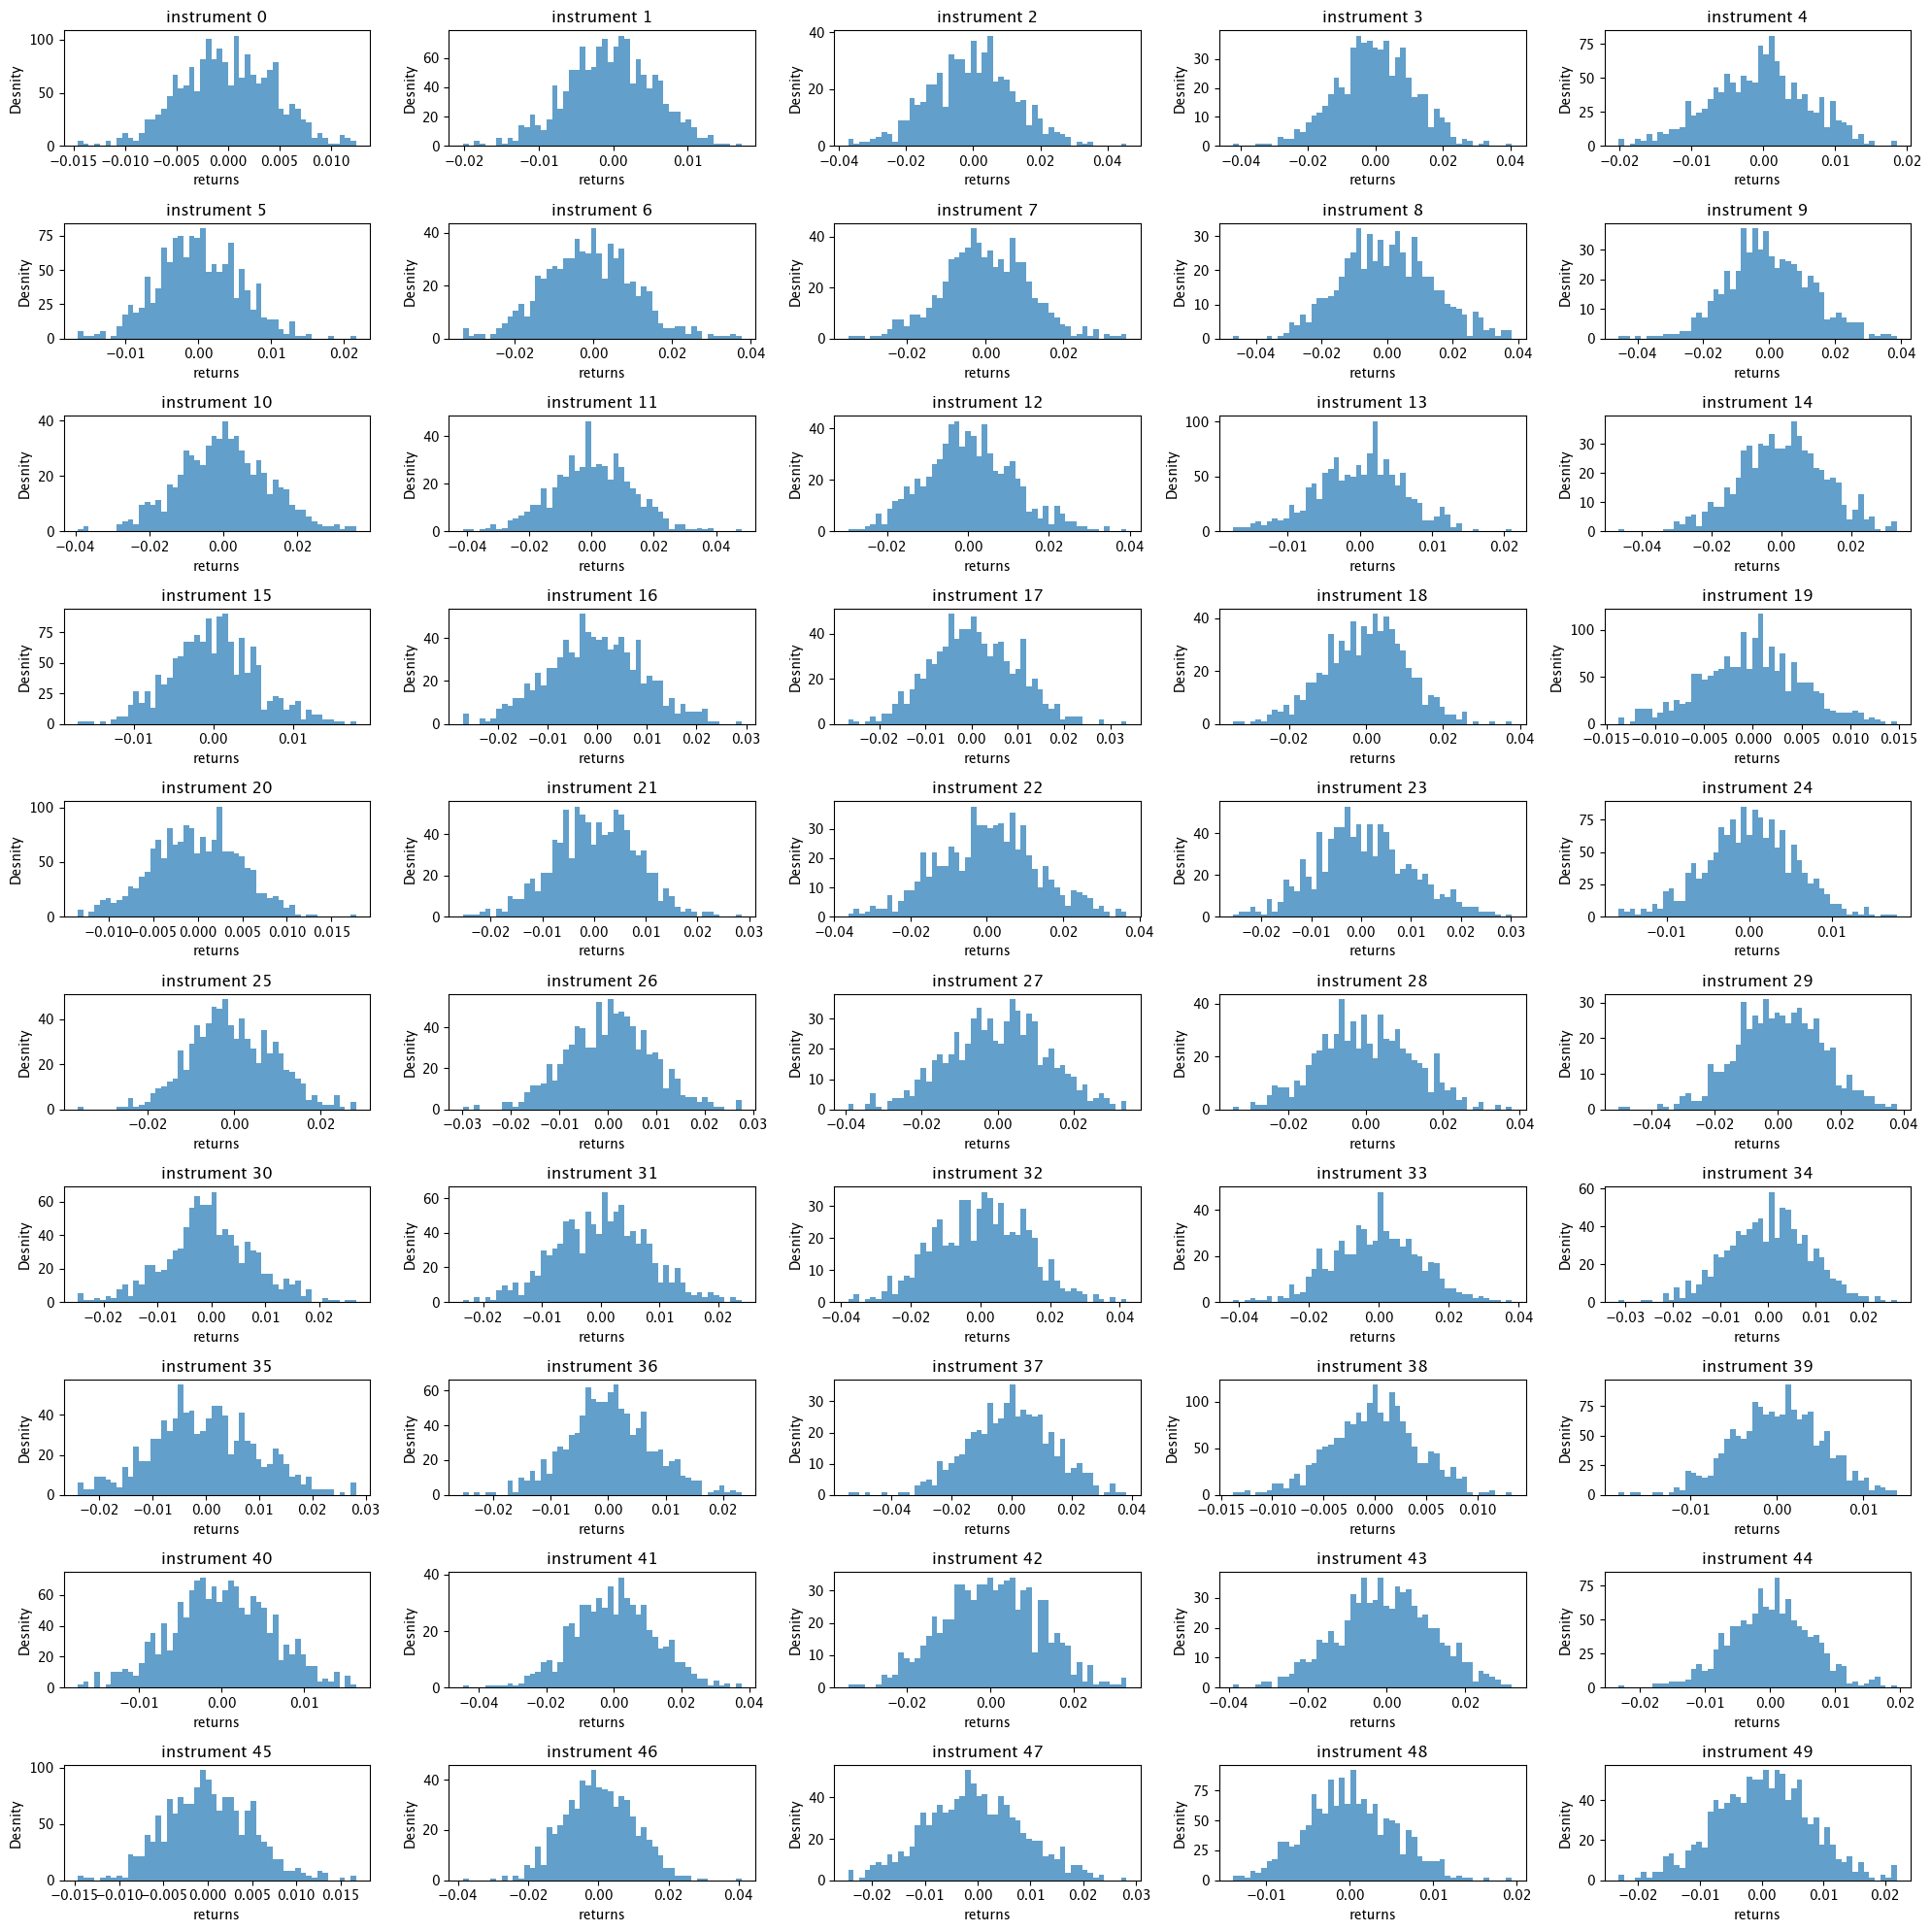

In [24]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D axes array for easier iteration

# Plot each column in its own subplot
for i in range(50):
    axes[i].hist(returns[i], bins=50, alpha=0.7, density=True)
    axes[i].set_title(f'instrument {i}')
    axes[i].set_xlabel('returns')
    axes[i].set_ylabel('Desnity')

# Turn off any unused subplots if num_columns < 50
for i in range(50, 50):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

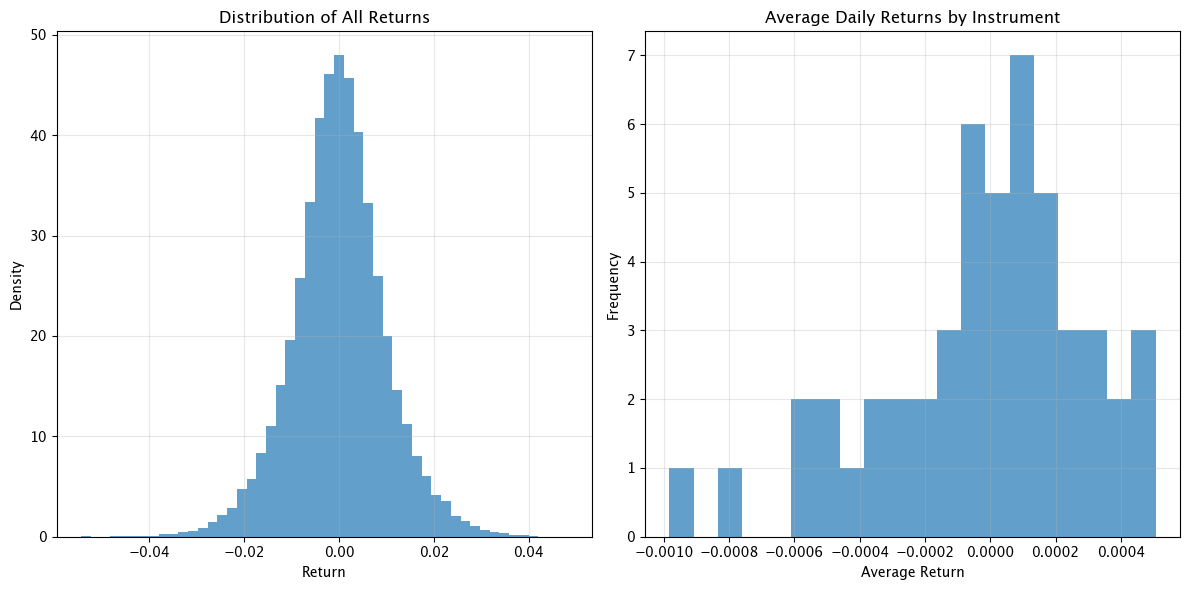

In [27]:
plt.figure(figsize=(12, 6))

# Overall returns distribution
plt.subplot(1, 2, 1)
plt.hist(returns.flatten(), bins=50, alpha=0.7, density=True)
plt.title('Distribution of All Returns')
plt.xlabel('Return')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

# Average daily returns per instrument
plt.subplot(1, 2, 2)
avg_returns = returns.mean(axis=1)
plt.hist(avg_returns, bins=20, alpha=0.7)
plt.title('Average Daily Returns by Instrument')
plt.xlabel('Average Return')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

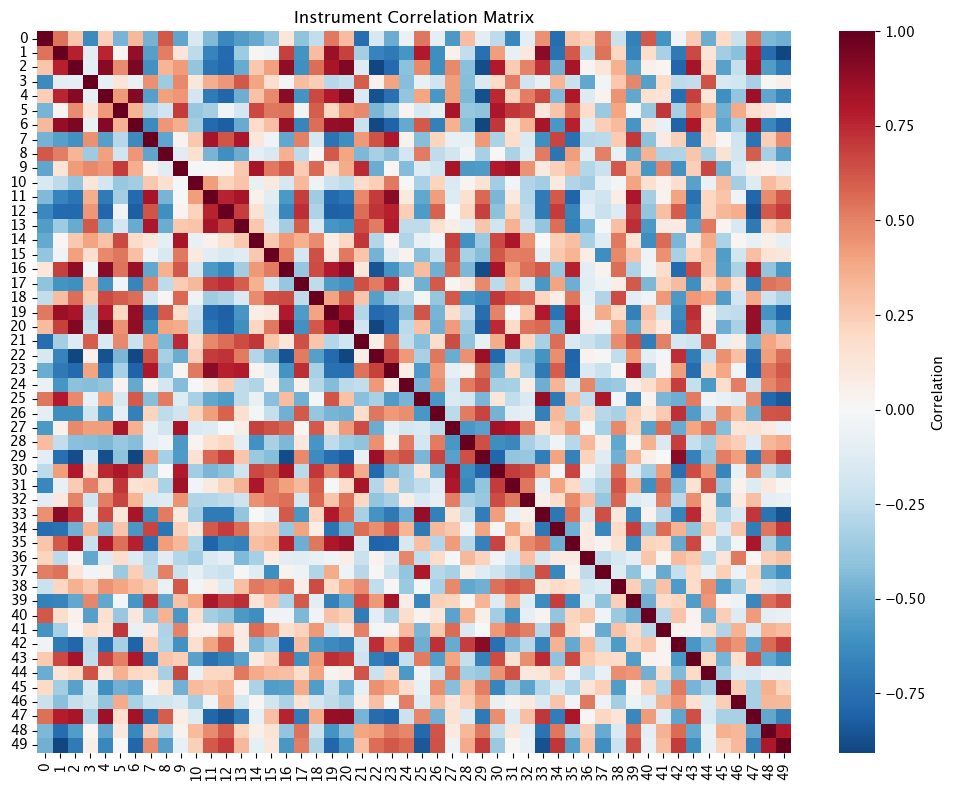

In [29]:
corr = np.corrcoef(prices)

plt.figure(figsize=(10, 8))
num = corr.shape[0]
sns.heatmap(corr, 
            xticklabels=[f'{i}' for i in range(num)],
            yticklabels=[f'{i}' for i in range(num)],
            cmap='RdBu_r', center=0, 
            cbar_kws={'label': 'Correlation'})
plt.title('Instrument Correlation Matrix')
plt.tight_layout()
plt.show()